In [1]:
import iris
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
crut1_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.1.nc"
crut1 = iris.load(crut1_file)

/Users/admin/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)


In [3]:
temp1 = crut1[0]
print temp1

near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)
     Dimension coordinates:
          time                              x               -              -
          latitude                          -               x              -
          longitude                         -               -              x
     Attributes:
          Conventions: CF-1.0
          comment: 
          ensemble_member_index: 1
          ensemble_members: 100
          history: Updated at 26/04/2016 17:56:02
          institution: Met Office Hadley Centre / Climatic Research Unit, University of East ...
          reference: Morice, C. P., J. J. Kennedy, N. A. Rayner, and P. D. Jones (2012), Quantifying...
          reference_period: [1961 1990]
          source: CRUTEM.4.4.0.0, HadSST.3.1.1.0
          title: HadCRUT4 surface temperature ensemble data
          version: HadCRUT.4.4.0.0


In [4]:
temp1.data[50,10,:100]

masked_array(data = [-- -1.929032564163208 -1.0620859861373901 -- -- -- -- -- -- -- -- -- -- --
 -- 1.395857572555542 1.5749757289886475 1.9614238739013672
 0.3297724425792694 -0.7564617991447449 -0.8942558765411377 -- -- --
 -1.414282202720642 -3.4572060108184814 -1.5007556676864624
 -2.054985761642456 -1.363309383392334 -0.8298271298408508
 0.7473303079605103 -- -2.700113534927368 -3.2038867473602295
 -0.8137658834457397 0.32012009620666504 -0.6571294069290161
 -0.394691526889801 1.5803134441375732 0.09075349569320679
 0.5423750877380371 -1.0599359273910522 -2.0287587642669678
 -2.33744215965271 -0.8020325899124146 -1.175288200378418 -- --
 -1.4797805547714233 -1.1437242031097412 -0.45379236340522766
 -0.6459062099456787 -2.1805334091186523 -1.9400339126586914
 -0.29204627871513367 -0.24518170952796936 -0.3288021683692932
 -1.0042250156402588 -- -- -1.6809279918670654 -1.0499085187911987
 -1.5015671253204346 -1.596004843711853 -- -- -- -- -- 1.1307103633880615
 1.8464653491973877 --]

In [5]:
temp1.data.set_fill_value(-0.19850300544470398)

In [6]:
norm_temp1 = temp1 / max(temp1.data.filled().max(), -temp1.data.filled().min())

In [7]:
norm_temp1.data.set_fill_value(-0.19850300544470398)

In [60]:
pca = PCA(n_components=12)

In [80]:
X = norm_temp1.data.filled().reshape(1995, 72*36)

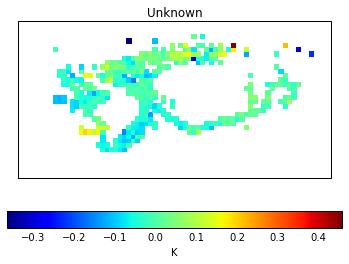

In [84]:
qplt.pcolormesh(norm_temp1[1,:,:])
plt.show()

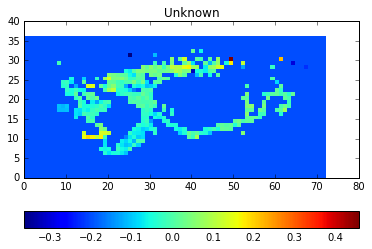

In [83]:
qplt.pcolormesh(iris.cube.Cube(X.reshape(1995, 36, 72)[1,:,:]))
plt.show()

In [85]:
pca.fit(X)

PCA(copy=True, n_components=12, whiten=False)

In [86]:
pca.components_[0].shape

(2592,)

In [87]:
pca.score(X)

3666.6641

In [100]:
pca.components_.shape

(12, 2592)

In [104]:
comp_cubes = []
for c in pca.components_:
    comp_cubes.append(iris.cube.Cube(data=c.reshape(36, 72)))

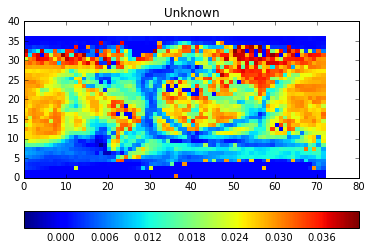

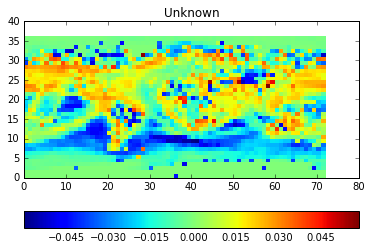

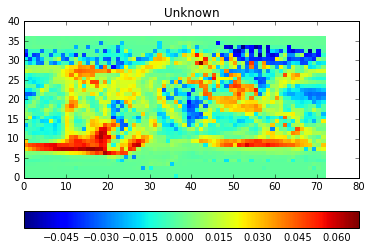

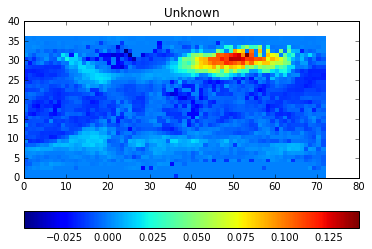

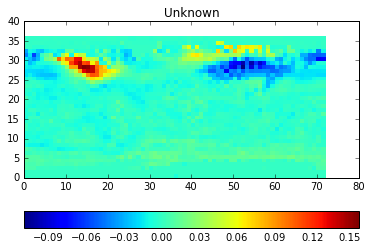

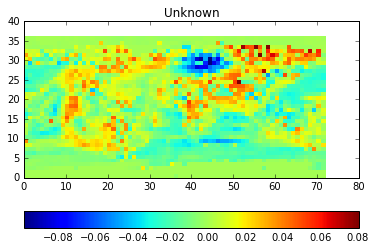

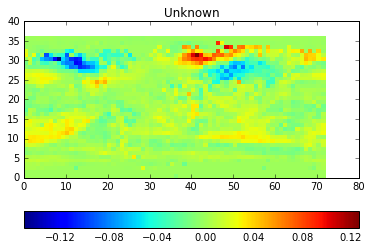

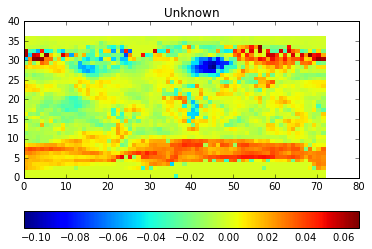

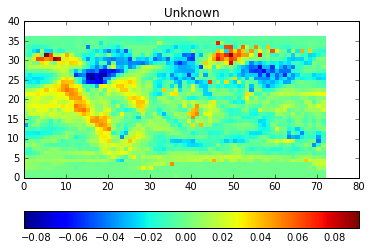

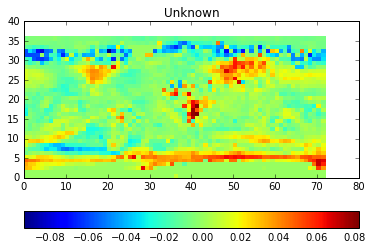

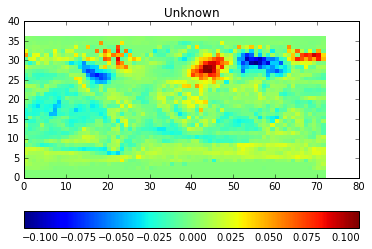

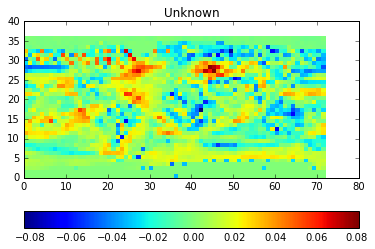

In [105]:
for cc in comp_cubes:
    qplt.pcolormesh(cc)
    plt.show()